### the purpose of this notebook is to explore how eric's code does the linearization so that I can appropriately feed it into dan's decoder 

- in dan's code it looks like anything in the seg_idx col ==0 is set to invalid.
- seg_idx == 1 is center arm
- seg_idx == 2, 3 is left arm
- seg_idx == 4, 5 is right arm

-- in eric's code
-- left is 0, 1
-- center is 2
-- right is 3, 4

=== so i need to do a remapping of eric's position in the lfpos converter to make

- 2 => 1
- 0,1 => 2, 3
- 3, 4 => 4, 5

In [54]:
tospykshrk = {2:1, 0:2, 1:3, 3:4, 4:5}

smalldf['spykshrk_seg'] = smalldf.track_segment_id.map(tospykshrk)

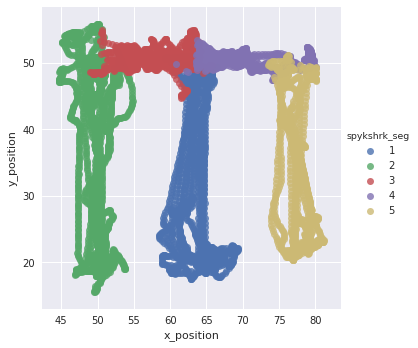

In [57]:
sns.lmplot('x_position', 'y_position', data=smalldf , hue='spykshrk_seg', fit_reg=False)

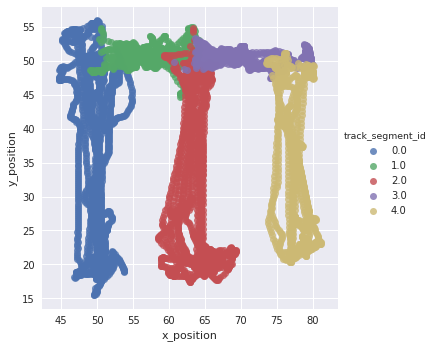

In [47]:
sns.lmplot('x_position', 'y_position', data=smalldf , hue='track_segment_id', fit_reg=False)

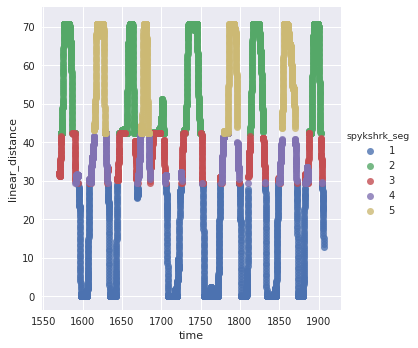

In [58]:
sns.lmplot('time', 'linear_distance', data=smalldf , hue='spykshrk_seg', fit_reg=False)

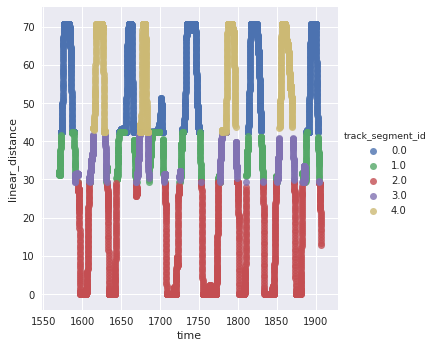

In [52]:
sns.lmplot('time', 'linear_distance', data=smalldf , hue='track_segment_id', fit_reg=False)

In [50]:
import sys
sys.path.insert(0, '/home/droumis/Src/loren_frank_data_processing/')
import loren_frank_data_processing as lfdp
import loren_frank_data_processing.tetrodes as lftet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
jz1 = lfdp.Animal(directory='/home/droumis/Src/Roumis_2018/Raw-Data/JZ1/', short_name='JZ1')
animals = {'JZ1': jz1}

In [3]:
get_pos_time = lfdp.position.get_pos_time

In [4]:
epoch_key = ('JZ1', 4, 2)

In [5]:
# jz1_pos = lfdp.position.get_interpolated_position_dataframe(epoch_key, animals, time_function=get_pos_time)

In [6]:
# %store jz1_pos
%store -r jz1_pos

In [7]:
jz1_pos.head()

,labeled_segments,from_well,to_well,task,is_correct,turn,x_position,y_position,head_direction,speed,linear_distance,linear_position
time,,,,,,,,,,,,
00:26:09.644833,1,NaN,NaN,NaN,False,NaN,62.079325,45.782275,-2.044152,2.957685,25.651080,NaN
00:26:09.678467,1,NaN,NaN,NaN,False,NaN,61.981150,45.553200,-2.015216,2.957685,25.422005,NaN
00:26:09.712100,1,NaN,NaN,NaN,False,NaN,61.915700,45.356850,-2.015216,2.968585,25.225655,NaN
00:26:09.745700,1,NaN,NaN,NaN,False,NaN,61.686625,45.193225,-2.004750,2.981514,25.062030,NaN
00:26:09.779333,1,NaN,NaN,NaN,False,NaN,61.490275,45.127775,-2.064738,3.007995,24.996580,NaN


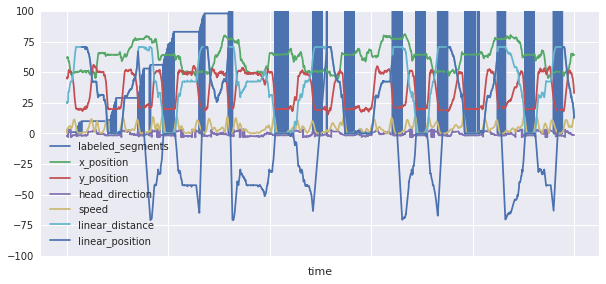

In [8]:
sns.set_context('notebook')
smalldf = jz1_pos.iloc[0:10000]#.drop(['labeled_segments'], axis=1)
smalldf.plot(figsize=(10,5), ylim=(-100, 100))

In [9]:
dfsm = smalldf[['x_position', 'y_position']].stack().reset_index()
dfsm.columns=['time', 'posdim', 'position']

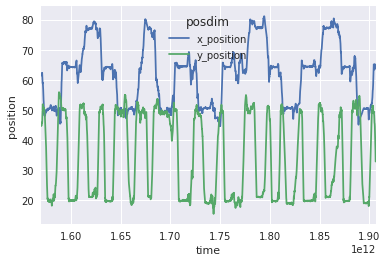

In [10]:
sns.tsplot(dfsm, time='time', unit='posdim', condition='posdim', value='position')

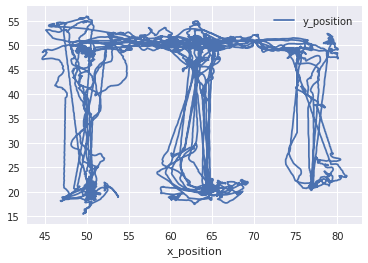

In [11]:
smalldf.plot('x_position', 'y_position') #.x_position.values, position_info.y_position.values);

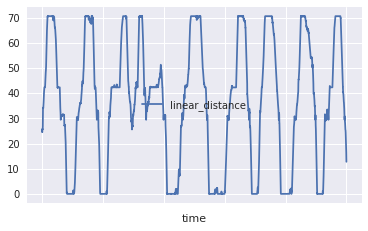

In [12]:
smalldf['time']=smalldf.index
smalldf.plot('time', 'linear_distance')

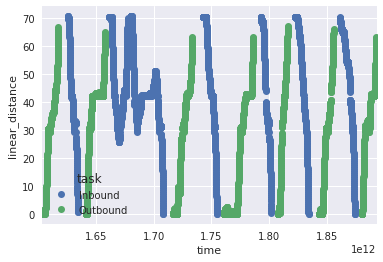

In [13]:
sns.tsplot(smalldf, time='time', unit='task', condition='task', value='linear_distance', interpolate=False)

a better way:

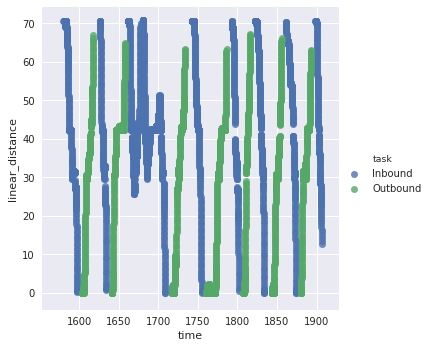

In [14]:
smalldf['time'] = smalldf.time.dt.total_seconds()
sns.lmplot(x='time', y='linear_distance', data=smalldf, hue='task', fit_reg=False)

In [41]:
track_graph, center_well_id = lfdp.position.make_track_graph(epoch_key, animals)

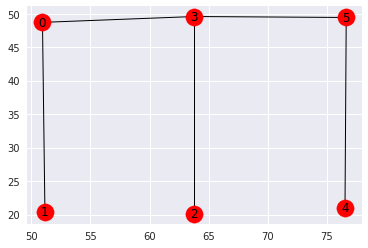

In [44]:
lfdp.track_segment_classification.plot_track(track_graph, ax=None)

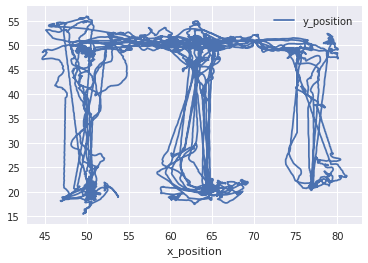

In [42]:
smalldf.plot('x_position', 'y_position');

In [16]:
position = smalldf.loc[:, ['x_position', 'y_position']].values

smalldf['track_segment_id'] = lfdp.track_segment_classification.classify_track_segments(
    track_graph, position,
    route_euclidean_distance_scaling=1E-1)

smalldf['linear_distance'] = lfdp.track_segment_classification.calculate_linear_distance(
    track_graph, smalldf.track_segment_id , center_well_id, position)

In [18]:
smalldf.head()

,labeled_segments,from_well,to_well,task,is_correct,turn,x_position,y_position,head_direction,speed,linear_distance,linear_position,time,track_segment_id
time,,,,,,,,,,,,,,
00:26:09.644833,1,NaN,NaN,NaN,False,NaN,62.079325,45.782275,-2.044152,2.957685,31.416430,NaN,1569.644833,1.0
00:26:09.678467,1,NaN,NaN,NaN,False,NaN,61.981150,45.553200,-2.015216,2.957685,31.529926,NaN,1569.678467,1.0
00:26:09.712100,1,NaN,NaN,NaN,False,NaN,61.915700,45.356850,-2.015216,2.968585,31.608552,NaN,1569.712100,1.0
00:26:09.745700,1,NaN,NaN,NaN,False,NaN,61.686625,45.193225,-2.004750,2.981514,31.848204,NaN,1569.745700,1.0
00:26:09.779333,1,NaN,NaN,NaN,False,NaN,61.490275,45.127775,-2.064738,3.007995,32.048543,NaN,1569.779333,1.0


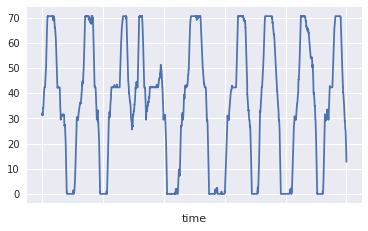

In [21]:
smalldf.linear_distance.plot()

In [22]:
import networkx as nx
center_arm_distance = nx.shortest_path_length(track_graph, source=2, target=3, weight='distance')
left_arm_distance = nx.shortest_path_length(track_graph, source=1, target=3, weight='distance')
right_arm_distance = nx.shortest_path_length(track_graph, source=4, target=3, weight='distance')

In [23]:
left_arm_distance

41.16750172211449

In [24]:
center_arm_distance

29.446064139941697

In [25]:
right_arm_distance

41.28381428778785

In [26]:
nodepos = nx.get_node_attributes(track_graph, 'pos')

In [27]:
nodepos

{0: (50.93894009216591, 48.70262390670554),
 1: (51.1463133640553, 20.42274052478134),
 2: (63.79608294930877, 20.131195335276963),
 3: (63.79608294930877, 49.57725947521866),
 4: (76.54953917050693, 21.005830903790084),
 5: (76.65322580645162, 49.43148688046647)}

In [45]:
track_segments, center_well_position = lfdp.position.get_track_segments(epoch_key, animals)
nodes = np.unique(track_segments.reshape((-1, 2)), axis=0)

In [31]:
nodes

array([[50.93894009, 48.70262391],
       [51.14631336, 20.42274052],
       [63.79608295, 20.13119534],
       [63.79608295, 49.57725948],
       [76.54953917, 21.0058309 ],
       [76.65322581, 49.43148688]])

In [304]:
nx.dijkstra_path_length(track_graph, source=2, target=3, weight='distance')

29.446064139941697

ok so all of that was just so that i can get a sense of where the position numbers come from 

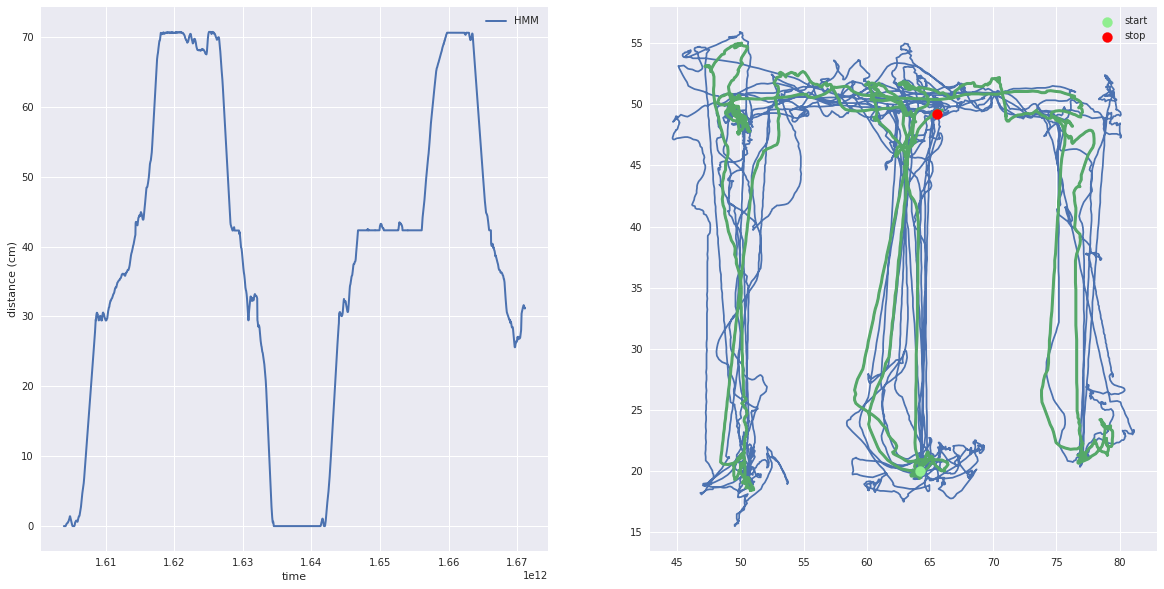

In [51]:
def plot_linear_distance(linear_distance, position, indices):
    time_ind = slice(*indices)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].plot(linear_distance[time_ind], linewidth=2, label='HMM')
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('distance (cm)')
    axes[0].legend();
    
    axes[1].plot(position[:, 0], position[:, 1])
    axes[1].plot(position[time_ind][:, 0], position[time_ind][:, 1],
                 linewidth=3)
    start_stop = position[time_ind][[0, -1], :]
    axes[1].scatter(start_stop[0, 0], start_stop[0, 1],
                    label='start', color='lightgreen', s=100, zorder=1000)
    axes[1].scatter(start_stop[1, 0], start_stop[1, 1],
                    label='stop', color='red', s=100, zorder=1000)
    axes[1].legend()
    
    
plot_linear_distance(smalldf.linear_distance, position, (1000, 3000))